<a href="https://colab.research.google.com/github/eolson615/SpringboardDSCareerTrack/blob/master/Capstone2_LogisticRegression_initialassessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook contains the preprocessing, pipeline creation, model training, and model testing along with subsequent analysis using a logistic regression model on the Telco Customer Churn dataset. I have already done the data cleaning and EDA in previous notebooks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_url = '/content/drive/My Drive/Colab Notebooks/Capstone2/telcodata_posteda.csv'
df = pd.read_csv(df_url, index_col=[0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

###I will first check out the shape and types of my X and y datasets to make sure they are compatable and there are no unexpected idiosyncrasies.

In [ ]:
Xcheck = df.drop(columns='Churn').values
Xcheck

array([['Female', 0, 'Yes', ..., 'Electronic check', 29.85, 29.85],
       ['Male', 0, 'No', ..., 'Mailed check', 56.95, 1889.5],
       ['Male', 0, 'No', ..., 'Mailed check', 53.85, 108.15],
       ...,
       ['Female', 0, 'Yes', ..., 'Electronic check', 29.6, 346.45],
       ['Male', 1, 'Yes', ..., 'Mailed check', 74.4, 306.6],
       ['Male', 0, 'No', ..., 'Bank transfer (automatic)', 105.65,
        6844.5]], dtype=object)

In [ ]:
type(Xcheck), Xcheck.shape

(numpy.ndarray, (7043, 19))

In [ ]:
ycheck = (df.Churn == 'Yes').values
ycheck

array([False, False,  True, ..., False,  True, False])

In [ ]:
type(ycheck), ycheck.shape

(numpy.ndarray, (7043,))

###Everything looked good. The number for rows and shapes and types all match up.

###Now I will create my train test split and check to make sure they come out how I would expect in terms of type and shape.

In [ ]:
X = df.drop(columns='Churn')
y = df.Churn
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=56)

In [ ]:
print('Xtrain', type(Xtrain), Xtrain.shape, Xtrain)
print('\n')
print("Xtrest", type(Xtest), Xtest.shape, Xtest)
print('\n')
print('ytrain', type(ytrain), ytrain.shape, ytrain)
print('\n')
print("ytrest", type(ytest), ytest.shape, ytest)

Xtrain <class 'pandas.core.frame.DataFrame'> (5282, 19)       gender  SeniorCitizen  ... MonthlyCharges TotalCharges
2500    Male              0  ...          75.50      4025.60
2456    Male              0  ...          24.55      1160.45
1705  Female              1  ...          90.45      5044.80
3011  Female              0  ...          19.75       210.65
5444    Male              0  ...         107.75      4882.80
...      ...            ...  ...            ...          ...
1259  Female              1  ...          95.25      4424.20
5538  Female              0  ...          81.10        81.10
3264  Female              0  ...          91.10       964.35
399   Female              0  ...          20.05       415.10
2532  Female              1  ...         101.10      4016.20

[5282 rows x 19 columns]


Xtrest <class 'pandas.core.frame.DataFrame'> (1761, 19)       gender  SeniorCitizen  ... MonthlyCharges TotalCharges
6046  Female              0  ...          85.30       781.40
6494  

###Now I will set up a generic pipeline and with a column transfor to OneHotEncode the categorical features and StandardScaler for numerical features. Then I will pass it into base SciKit Learn LogisticRegression model using a cross validation process. This is will give me a baseline score. Later I will include a gridsearchCV for hyperparameter selection.

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
num_features = X.select_dtypes(include=['float64', 'int64']).columns
num_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(), cat_features), (StandardScaler(), num_features), remainder='passthrough')
logreg = LogisticRegression(max_iter=5000)

In [ ]:
logreg_pipeline = make_pipeline(column_trans, logreg)
logreg_cvs = cross_val_score(logreg_pipeline, Xtrain, ytrain, scoring='accuracy')
logreg_cvs

0.7996959304492417

In [ ]:
logreg_pipeline.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'Multiple...
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))],
    

In [ ]:
ypred_train = logreg_pipeline.predict(Xtrain)

In [ ]:
ypred_train

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
#target_names = ['No', 'Yes']
class_report_train = classification_report(ytrain, ypred_train)
print(class_report_train)

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      3885
         Yes       0.65      0.55      0.59      1397

    accuracy                           0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.80      5282



In [ ]:
ypred = logreg_pipeline.predict(Xtest)

In [ ]:
ypred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
class_report = classification_report(ytest, ypred)
print(class_report)

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1289
         Yes       0.70      0.55      0.62       472

    accuracy                           0.82      1761
   macro avg       0.77      0.73      0.75      1761
weighted avg       0.81      0.82      0.81      1761



###We see two major things here. <br> 1)That the accuracy for the test case is higher than the accuracy for the training case. This tells us that there has not been overfitting, but instead there might be an issue with our base model. I will go back and look at the percentages for our target variable and see if there is an issue there. <br> 2)The recall for Yes is very low. To answere our business question of trying to help determine which customers are prone to Churning, this model has not done that very well. I will see how our adjustments to fix the imbalanced data will change this result before deciding on further action.

In [ ]:
cnf_matrix_strandard_logreg = metrics.confusion_matrix(ytest, ypred)
cnf_matrix_strandard_logreg

array([[1177,  112],
       [ 212,  260]])

Text(0.5, 12.5, 'Predicted label')

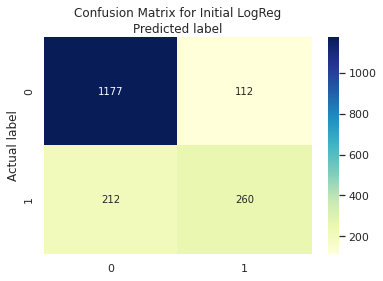

In [ ]:
class_names = ['No', 'Yes']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_strandard_logreg), annot=True,
            cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Initial LogReg', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy:', metrics.accuracy_score(ytest, ypred))
print('Precision:', metrics.precision_score(ytest, ypred, pos_label='Yes'))
print('Recall:', metrics.recall_score(ytest, ypred, pos_label='Yes'))

Accuracy: 0.8160136286201022
Precision: 0.6989247311827957
Recall: 0.5508474576271186


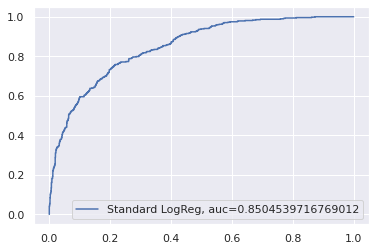

In [ ]:
ypred_prob = logreg_pipeline.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest, ypred_prob, pos_label='Yes')
auc = metrics.roc_auc_score(ytest, ypred_prob)
plt.plot(fpr, tpr, label='Standard LogReg, auc='+ str(auc))
plt.legend(loc='best')
plt.show()